<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de **Informações**<br>
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# 1. **Projeto:**

Abaixo estão descritos os resultados gerados a respeito de uma análise de crédito realizada com alguns clientes.

## 1. Desenvolvimento do projeto

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
  `idade` int,
  `sexo` string,
  `dependentes` int,
  `escolaridade` string,
  `estado_civil` string,
  `salario_anual` string,
  `tipo_cartao` string,
  `qtd_produtos` bigint,
  `iteracoes_12m` int,
  `meses_inativo_12m` int,
  `limite_credito` float,
  `valor_transacoes_12m` float,
  `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ',',
  'field.delim' = ','
) LOCATION 's3://bucket-transacoes-athos/'
TBLPROPERTIES ('has_encrypted_data'='false');
```

# 2. **Querys:**

## 2.1 Resultado da Tabela gerada:
```sql
select * from credito limit 10;
```
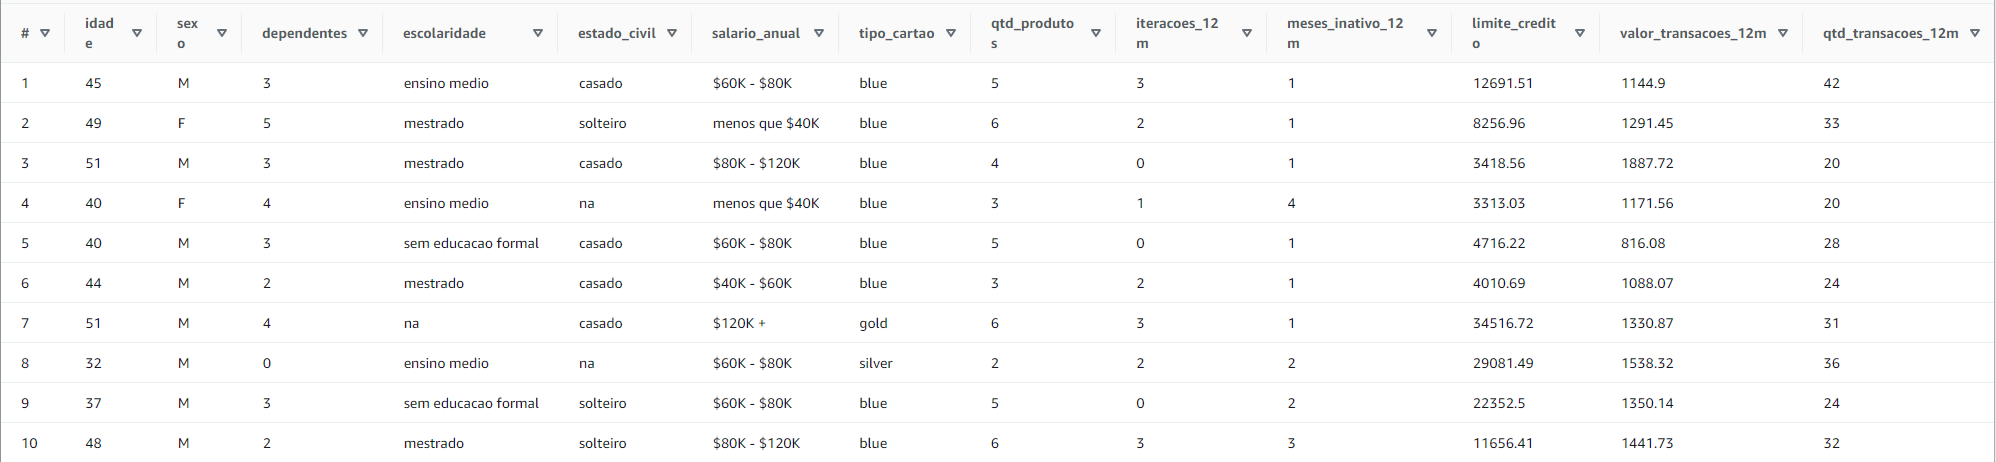







## 2.2 Número de linhas do código:

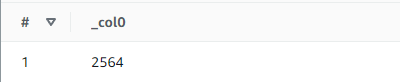



## 2.3 Estrutura da tabela:
```sql
DESCRIBE credito
```

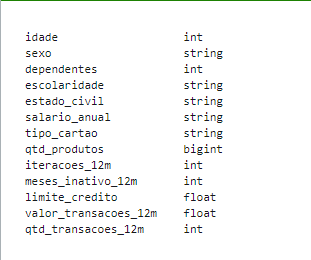


# 3. **Análise Exploratória dos Dados da Tabela:**

## 3.1 Dados base



Escolaridade dos clientes:

```sql
SELECT DISTINCT escolaridade FROM credito where escolaridade != 'na';
```
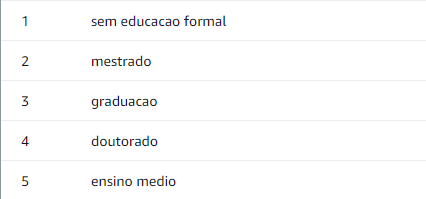

Estado civil:

```sql
SELECT DISTINCT estado_civil FROM credito where estado_civil != 'na';
```
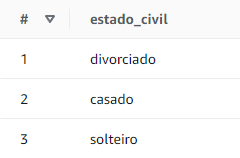


Salário:
```sql
SELECT DISTINCT salario_anual FROM credito where salario_anual != 'na' GROUP BY salario_anual ORDER BY salario_anual DESC;
```
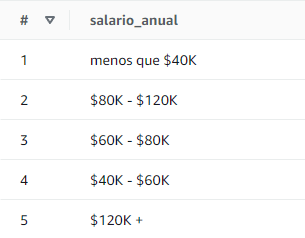

Cartões cadastrados:
```sql
SELECT DISTINCT tipo_cartao FROM credito;
```
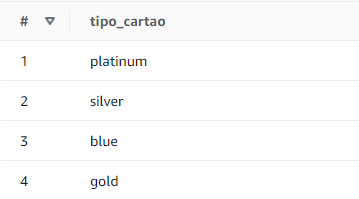

## 3.2 Análise combinatória

Filtragem por sexo dos clientes cadastrados:

```sql
SELECT COUNT(*) AS quantidade, sexo FROM credito GROUP BY sexo;
```

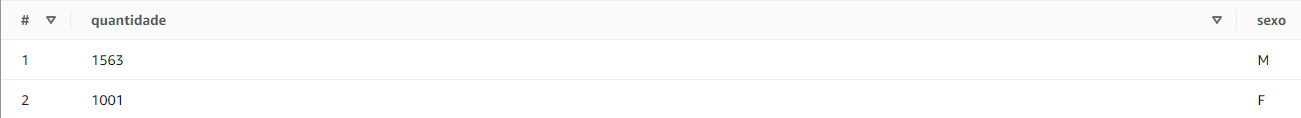

Filtragem média de idades agrupadas por sexo:
```sql
SELECT AVG(idade) AS media_idade, MIN (idade) AS min_idade, MAX(idade) AS  max_idade, sexo FROM credito GROUP BY sexo
```
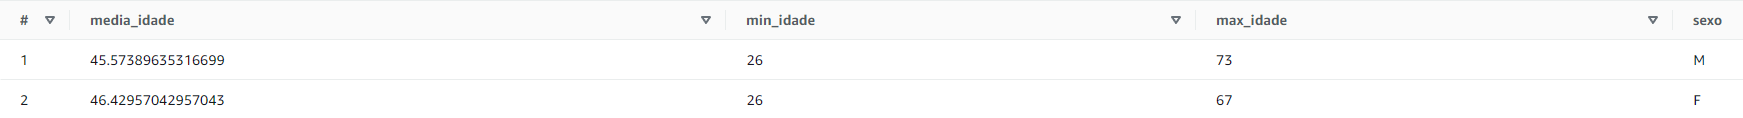

Filtragem por quantidade do salário anual dos clientes:
```sql
SELECT COUNT(*) AS quantidade, salario_anual FROM credito where salario_anual != 'na' GROUP BY salario_anual ORDER BY salario_anual DESC
```

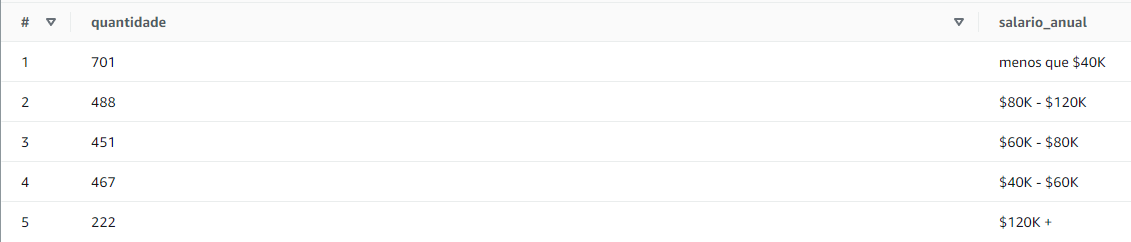

Filtragem por quantidade do estado civil dos clientes:
```sql
SELECT COUNT(*) AS quantidade, estado_civil FROM credito where estado_civil != 'na' GROUP BY estado_civil ORDER BY quantidade DESC;
```
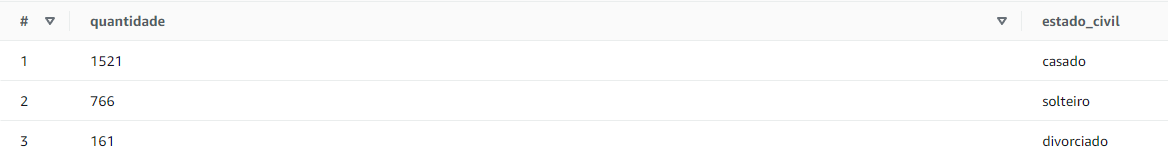

Filtragem dos valores medios, max e min das transações agrupados por sexo:
```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo
```

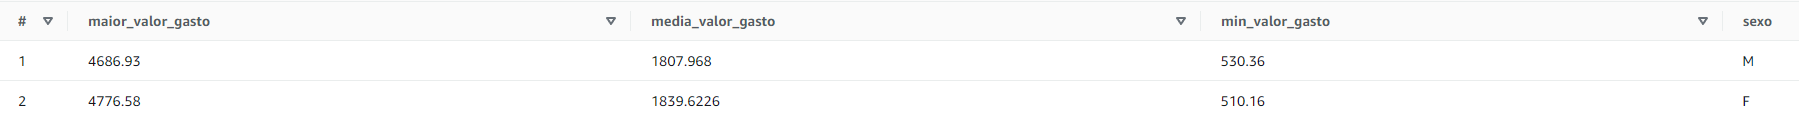

Filtragem da média, max e min dos valores gastos agrupados por estado civil:

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, estado_civil
from credito where estado_civil != 'na'
group by estado_civil
```
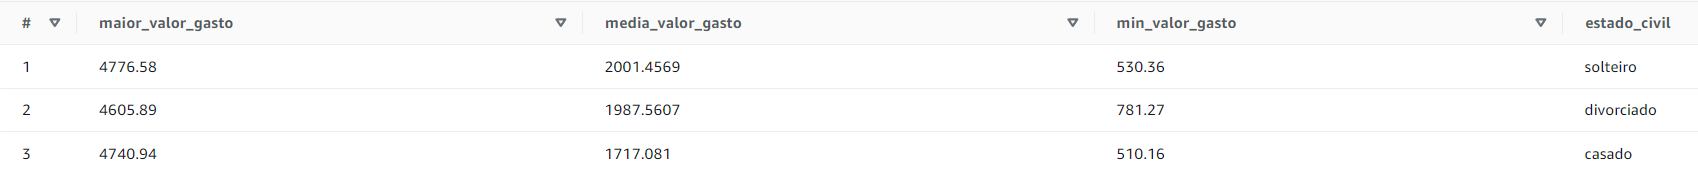

Filtragem da quantidade de produtos, média dos valores gastos, média de limite utilizado e salário anual dos clientes agrupados por sexo:

```sql
select avg(qtd_produtos) as quantidade_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc
```
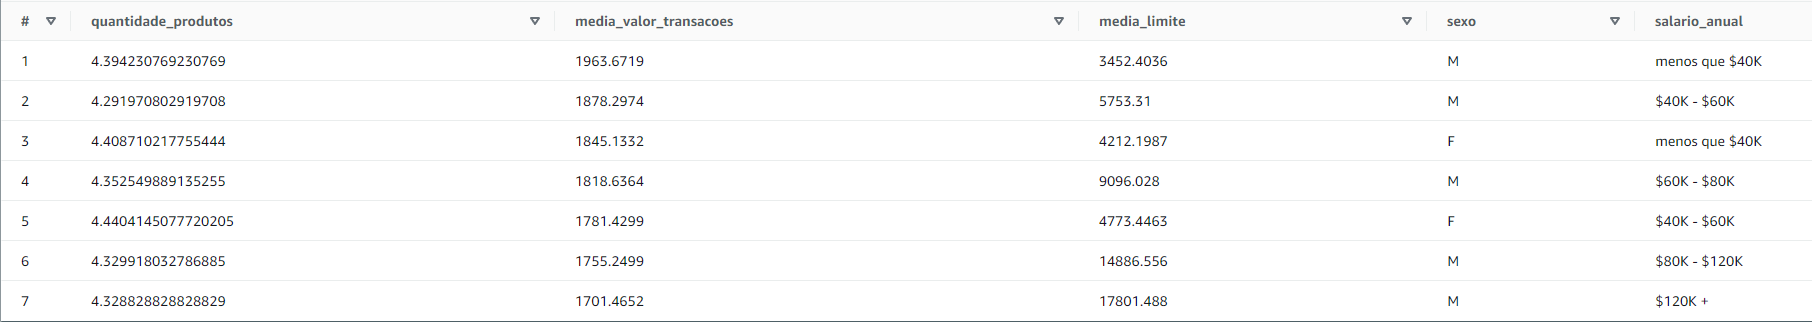

# 4. **Conclusão do projeto:**

Abaixo estão listadas Insights baseados nas tabelas geradas:

1.   Filtrando por sexo, conlui-se que o volume de homens excede o volume de mulheres cadastradas.

2.   O cálculo médio de idade exibe que para ambos os sexos, temos semelhanças em seus valores, onde a idade média beira entre 46 e 45 anos para homens e mulheres, respectivamente.

3.   A respeito dos valores de salários, há uma quantidade maior em liderança no número de clientes cuja faixa de salário é menor que 40K.

4.   O número de clientes cujo estado civil são caracterizados como casados, segue em liderança comparado aos clientes solteiros e divorciados.

5.   Sobre o cálculo médio dos valores gastos, quando agrupado por sexo, exibe valores maiories de gastos do sexo feminino.

6.   Agrupando por sexo, apenas os homens possuem salarios superiores à 120K, ainda sobre a faixa de 120K, a média dos valores das transações desse grupo segue sendo a menor em comparação aos outros índices.

7.   Com base na tabela, clientes do sexo feminino não possuem salario anual maior que 60K.   

8.   Trazendo como base a categoria de clientes filtrados por estado civil, temos o resultado de que os clientes solteiros possuem gastos maiores em comparação aos clientes casados e divorcidados. Os divorciados por sua vez seguem em segundo lugar comparados aos clientes casados.

9.   Os clientes com estado civil divorciado possuem liderança no valor mínimo gasto.

10.  Para finalizar, clientes do sexo feminino tem valores superiores aos clientes do sexo masculino na coluna do cálculo médio de valores gastos.


**Links:**

Kaggle: [Analise Exploratória de Dados em SQL](https://www.kaggle.com/athnxz/projeto-analise-explorat-ria-de-dados-em-sql)

Portfólio/GitHub: [Analise Exploratória de Dados em SQL](https://github.com/athnxz/Analise-Exploratoria-de-Dados-em-SQL)


